In [9]:
#最高人口密度クラスのMATとMAPの頻度分布を描画したい
import matplotlib.pyplot as plt
import numpy as np
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']

# 各年ごとのデータを格納する辞書
pop_count_data = {}
pop_density_data = {}
class_labels = {}

# 各年ごとにデータを読み込む
for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    class_labels[year] = np.load(f'class_labels_20_{year}.npy')

# 箱ひげ図を描画するためのデータを格納するリスト
boxplot_data_MAT = {year: [[] for _ in range(5)] for year in years}
boxplot_data_MAP = {year: [[] for _ in range(5)] for year in years}
grid_counts = {year: [0 for _ in range(5)] for year in years}
std_devs_MAT = {year: [0 for _ in range(5)] for year in years}
std_devs_MAP = {year: [0 for _ in range(5)] for year in years}

for year in years:
    for model in models:
        total_population = np.zeros(5)
        MAT = np.load(f'/work/a06/tsuda/m1/MAT2160×4320_mean_{year}.npy')
        MAP = np.load(f'/work/a06/tsuda/m1/MAP2160×4320_mean_{year}.npy')

        class_data_MAT = [[] for _ in range(5)]
        class_data_MAP = [[] for _ in range(5)]

        for i in range(5):
            lower_bound = class_labels[year][i]
            upper_bound = class_labels[year][i + 1]
            indices = np.where((lower_bound <= pop_density_data[year]) & (pop_density_data[year] < upper_bound))
            MAT_value = MAT[indices]
            MAP_value = MAP[indices]
            grid_counts[year][i] = len(indices[0])
            total_population[i] = np.round(np.sum(pop_count_data[year][indices]))
            repeated_data_MAT = np.repeat(MAT_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            repeated_data_MAP = np.repeat(MAP_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            class_data_MAT[i] = repeated_data_MAT
            class_data_MAP[i] = repeated_data_MAP

            boxplot_data_MAT[year][i].extend(repeated_data_MAT)
            boxplot_data_MAP[year][i].extend(repeated_data_MAP)
            std_devs_MAT[year][i] = np.std(repeated_data_MAT)
            std_devs_MAP[year][i] = np.std(repeated_data_MAP)







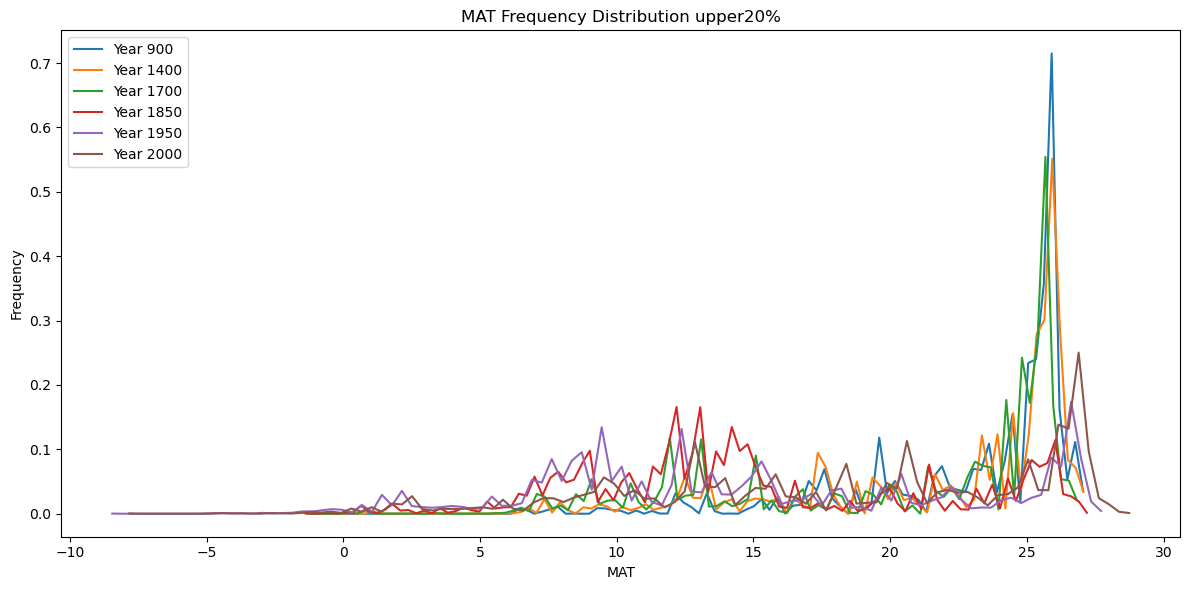

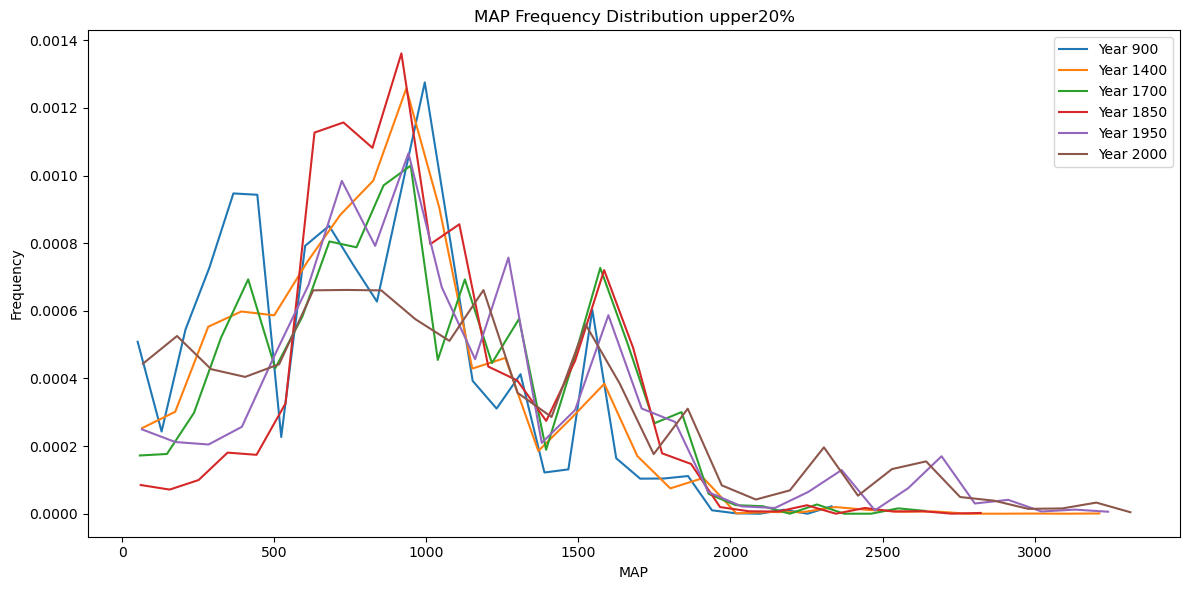

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 年代ごとのMATの頻度分布を描画
plt.figure(figsize=(12, 6))
for year in years:
    data = boxplot_data_MAT[year][4]
    counts, bins = np.histogram(data, bins=100, density=True)
    bins_center = (bins[:-1] + bins[1:]) / 2
    plt.plot(bins_center, counts, label=f'Year {year}')
plt.title('MAT Frequency Distribution upper20%')
plt.xlabel('MAT')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# 年代ごとのMAPの頻度分布を描画
plt.figure(figsize=(12, 6))
for year in years:
    data = boxplot_data_MAP[year][4]
    counts, bins = np.histogram(data, bins=30, density=True)
    bins_center = (bins[:-1] + bins[1:]) / 2
    plt.plot(bins_center, counts, label=f'Year {year}')
plt.title('MAP Frequency Distribution upper20%')
plt.xlabel('MAP')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
#人口密度100以上かどうかで分類て、各年代に関してまず箱ひげ図を描画
import matplotlib.pyplot as plt
import numpy as np
years = [900, 1400, 1700, 1850, 1950, 2000]
models = ['GISS', 'IPSL', 'HadCM3', 'MPI', 'CSIRO']

# 各年ごとのデータを格納する辞書
pop_count_data = {}
pop_density_data = {}
class_labels = {}

# 各年ごとにデータを読み込む
for year in years:
    pop_count_data[(year)] = np.load(f"pop_count_data_{year}.npy")
    pop_density_data[(year)] = np.load(f"pop_density_data_{year}.npy")
    class_labels[year] = [0,100,np.max(pop_density_data[year])]

# 箱ひげ図を描画するためのデータを格納するリスト
boxplot_data_MAT = {year: [[] for _ in range(2)] for year in years}
boxplot_data_MAP = {year: [[] for _ in range(2)] for year in years}
grid_counts = {year: [0 for _ in range(2)] for year in years}
std_devs_MAT = {year: [0 for _ in range(2)] for year in years}
std_devs_MAP = {year: [0 for _ in range(2)] for year in years}

for year in years:
    for model in models:
        total_population = np.zeros(2)
        MAT = np.load(f'/work/a06/tsuda/m1/MAT2160×4320_mean_{year}.npy')
        MAP = np.load(f'/work/a06/tsuda/m1/MAP2160×4320_mean_{year}.npy')

        class_data_MAT = [[] for _ in range(2)]
        class_data_MAP = [[] for _ in range(2)]

        for i in range(2):
            lower_bound = class_labels[year][i]
            upper_bound = class_labels[year][i + 1]
            indices = np.where((lower_bound <= pop_density_data[year]) & (pop_density_data[year] < upper_bound))
            MAT_value = MAT[indices]
            MAP_value = MAP[indices]
            grid_counts[year][i] = len(indices[0])
            total_population[i] = np.round(np.sum(pop_count_data[year][indices]))
            repeated_data_MAT = np.repeat(MAT_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            repeated_data_MAP = np.repeat(MAP_value, np.round((pop_count_data[year][indices])/1000).astype(int)+1)
            class_data_MAT[i] = repeated_data_MAT
            class_data_MAP[i] = repeated_data_MAP

            boxplot_data_MAT[year][i].extend(repeated_data_MAT)
            boxplot_data_MAP[year][i].extend(repeated_data_MAP)
            std_devs_MAT[year][i] = np.std(repeated_data_MAT)
            std_devs_MAP[year][i] = np.std(repeated_data_MAP)



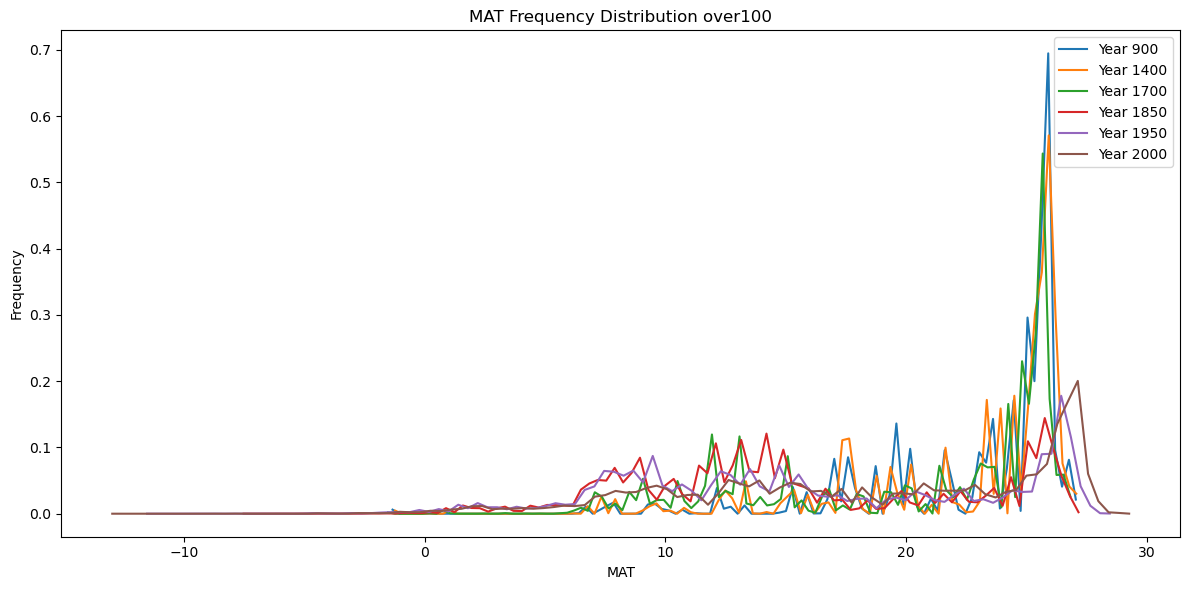

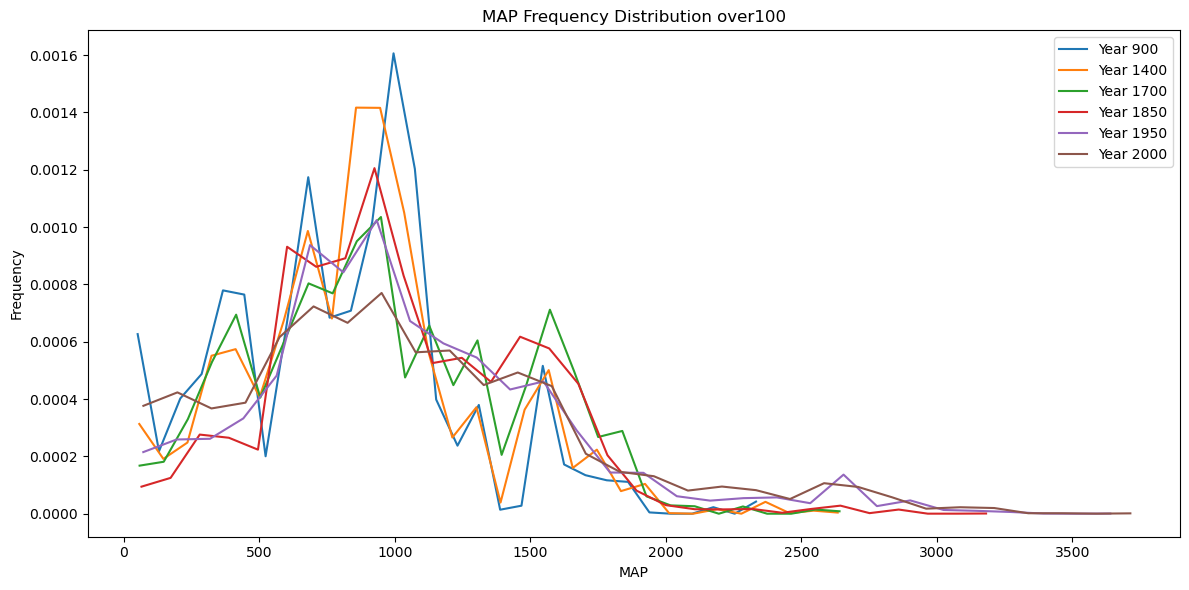

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 年代ごとのMATの頻度分布を描画
plt.figure(figsize=(12, 6))
for year in years:
    data = boxplot_data_MAT[year][1]
    counts, bins = np.histogram(data, bins=100, density=True)
    bins_center = (bins[:-1] + bins[1:]) / 2
    plt.plot(bins_center, counts, label=f'Year {year}')
plt.title('MAT Frequency Distribution over100')
plt.xlabel('MAT')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# 年代ごとのMAPの頻度分布を描画
plt.figure(figsize=(12, 6))
for year in years:
    data = boxplot_data_MAP[year][1]
    counts, bins = np.histogram(data, bins=30, density=True)
    bins_center = (bins[:-1] + bins[1:]) / 2
    plt.plot(bins_center, counts, label=f'Year {year}')
plt.title('MAP Frequency Distribution over100')
plt.xlabel('MAP')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()